#Introduction
In this project, we analyze a financial dataset containing the company’s sales and profit data across different market segments, discount bands, and countries.
The goal is to explore sales and profit trends over time, understand the impact of discounts, and identify the most profitable segments and regions.
Through this analysis, we aim to generate data-driven insights and strategic recommendations to enhance business performance and growth.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/content/Financials.csv")
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",1/6/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",1/6/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",1/6/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",1/3/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",1/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",1/2/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,1/4/2014,4,April,2014


#Data Preprocessing

In [3]:
df.describe()

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


In [4]:
df.isnull().sum()

,0
Segment,0
Country,0
Product,0
Discount Band,0
Units Sold,0
Manufacturing Price,0
Sale Price,0
Gross Sales,0
Discounts,0
Sales,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [6]:
df.columns = df.columns.str.strip()
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [7]:
# Function to convert values in parentheses to negative numbers
def convert_parentheses(val):
    if isinstance(val, str):
        if val.startswith('(') and val.endswith(')'):
            return -float(val[1:-1].replace(',', ''))
        else:
            return float(val)
    else:
        return val

In [8]:
cols_to_clean = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

# Remove '$', '-' and ',' from the columns, convert values in parentheses to negative numbers, convert empty strings to NaN, and then convert to float
for col in cols_to_clean:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('$', '').str.replace('-', '').str.replace(',', '').str.strip()
        df[col] = df[col].replace('', np.nan).apply(convert_parentheses).astype(float)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.00,21780.0,10890.00,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.00,8880.0,4440.00,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.00,24700.0,12350.00,2014-01-06,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-01-03,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-01-10,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-01-02,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-01-04,4,April,2014


In [10]:
df.isnull().sum()

,0
Segment,0
Country,0
Product,0
Discount Band,0
Units Sold,0
Manufacturing Price,0
Sale Price,0
Gross Sales,0
Discounts,53
Sales,0


In [11]:
df[cols_to_clean] = df[cols_to_clean].fillna(0)

In [12]:
summary_stats = df.groupby('Segment').agg({
    'Sales': ['mean', 'median', 'std'],
    'Profit': ['mean', 'median', 'std']
})
print("Summary Statistics for Sales and Profit by Market Segment:")
print(summary_stats)

Summary Statistics for Sales and Profit by Market Segment:
                          Sales                                   Profit  \
                           mean      median            std          mean   
Segment                                                                    
Channel Partners   18005.936400   18498.960    9156.473502  13168.031400   
Enterprise        196116.943800  185389.375  107631.255803  -6145.456200   
Government        175014.202267   27286.875  266986.546682  37960.577267   
Midmarket          23818.830900   24349.650   12324.443638   6601.030900   
Small Business    424279.185000  373755.000  239938.999668  41431.685000   

                                           
                     median           std  
Segment                                    
Channel Partners  13242.960   6706.583019  
Enterprise        -2769.375  11871.787155  
Government        12360.800  56108.500054  
Midmarket          6665.800   3555.430312  
Small Business    36592.

###Data Visualization

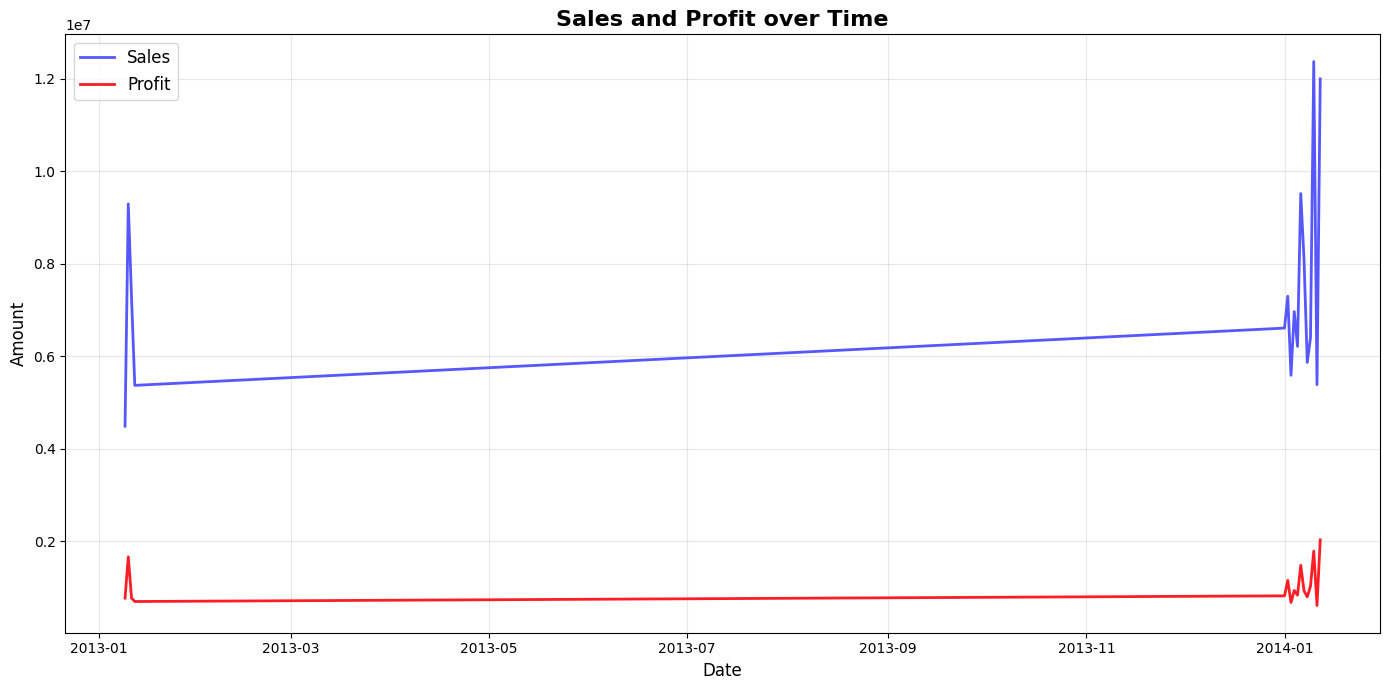

In [15]:
import matplotlib.pyplot as plt

blue = "#5757FF"
red = "#FF1D25"

# Group data by Date
grouped_df = df.groupby('Date').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plot Sales and Profit over time
plt.figure(figsize=(14, 7))
plt.plot(grouped_df.index, grouped_df['Sales'], color=blue, label='Sales', linewidth=2)
plt.plot(grouped_df.index, grouped_df['Profit'], color=red, label='Profit', linewidth=2)

plt.title('Sales and Profit over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

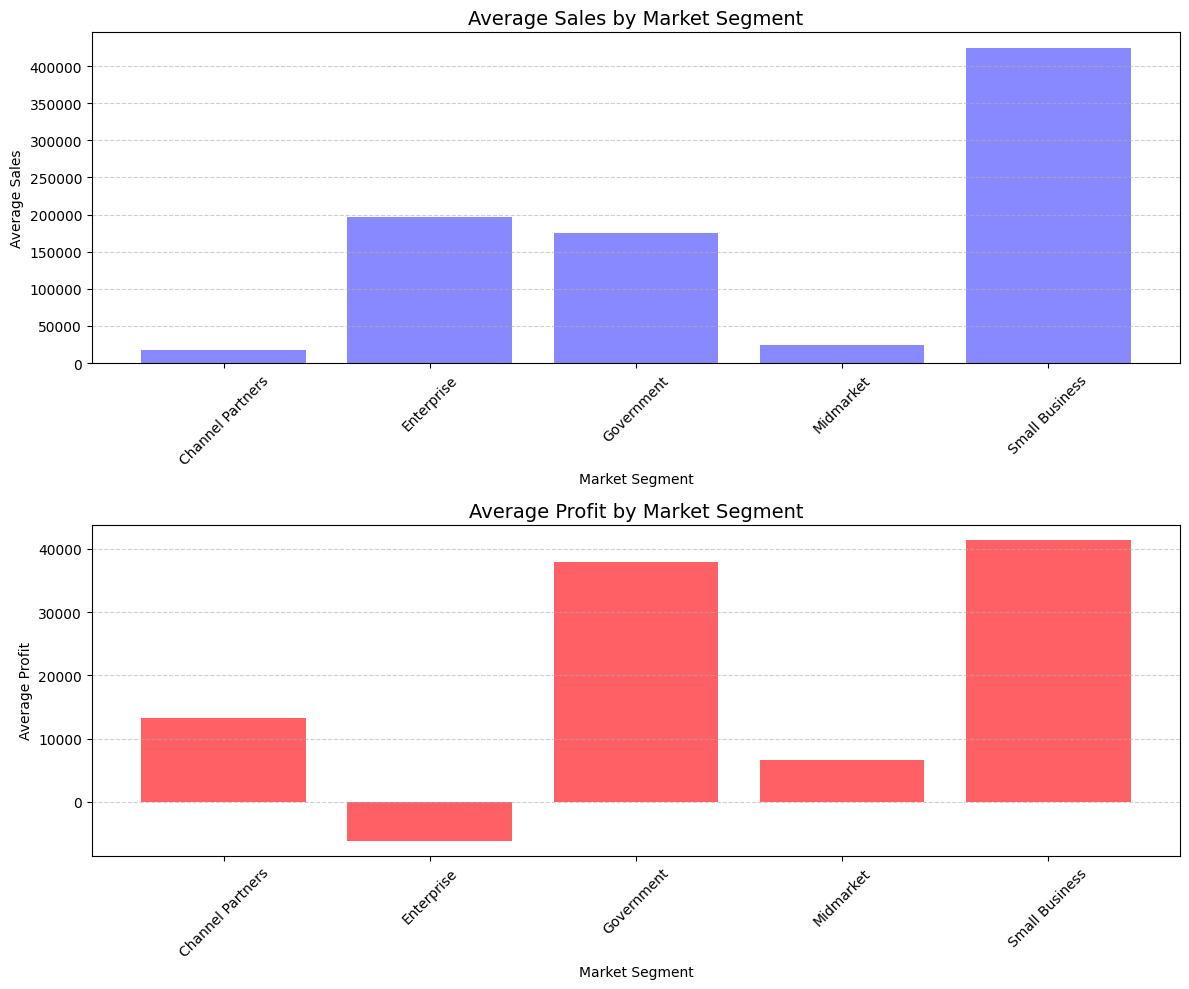

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot Average Sales
ax[0].bar(summary_stats.index, summary_stats[('Sales', 'mean')], color=blue, alpha=0.7)
ax[0].set_title('Average Sales by Market Segment', fontsize=14)
ax[0].set_xlabel('Market Segment')
ax[0].set_ylabel('Average Sales')
ax[0].grid(axis='y', linestyle='--', alpha=0.6)
ax[0].tick_params(axis='x', rotation=45)

# Plot Average Profit
ax[1].bar(summary_stats.index, summary_stats[('Profit', 'mean')], color=red, alpha=0.7)
ax[1].set_title('Average Profit by Market Segment', fontsize=14)
ax[1].set_xlabel('Market Segment')
ax[1].set_ylabel('Average Profit')
ax[1].grid(axis='y', linestyle='--', alpha=0.6)
ax[1].tick_params(axis='x', rotation=45)

# Adjust spacing between plots
plt.tight_layout()
plt.show()


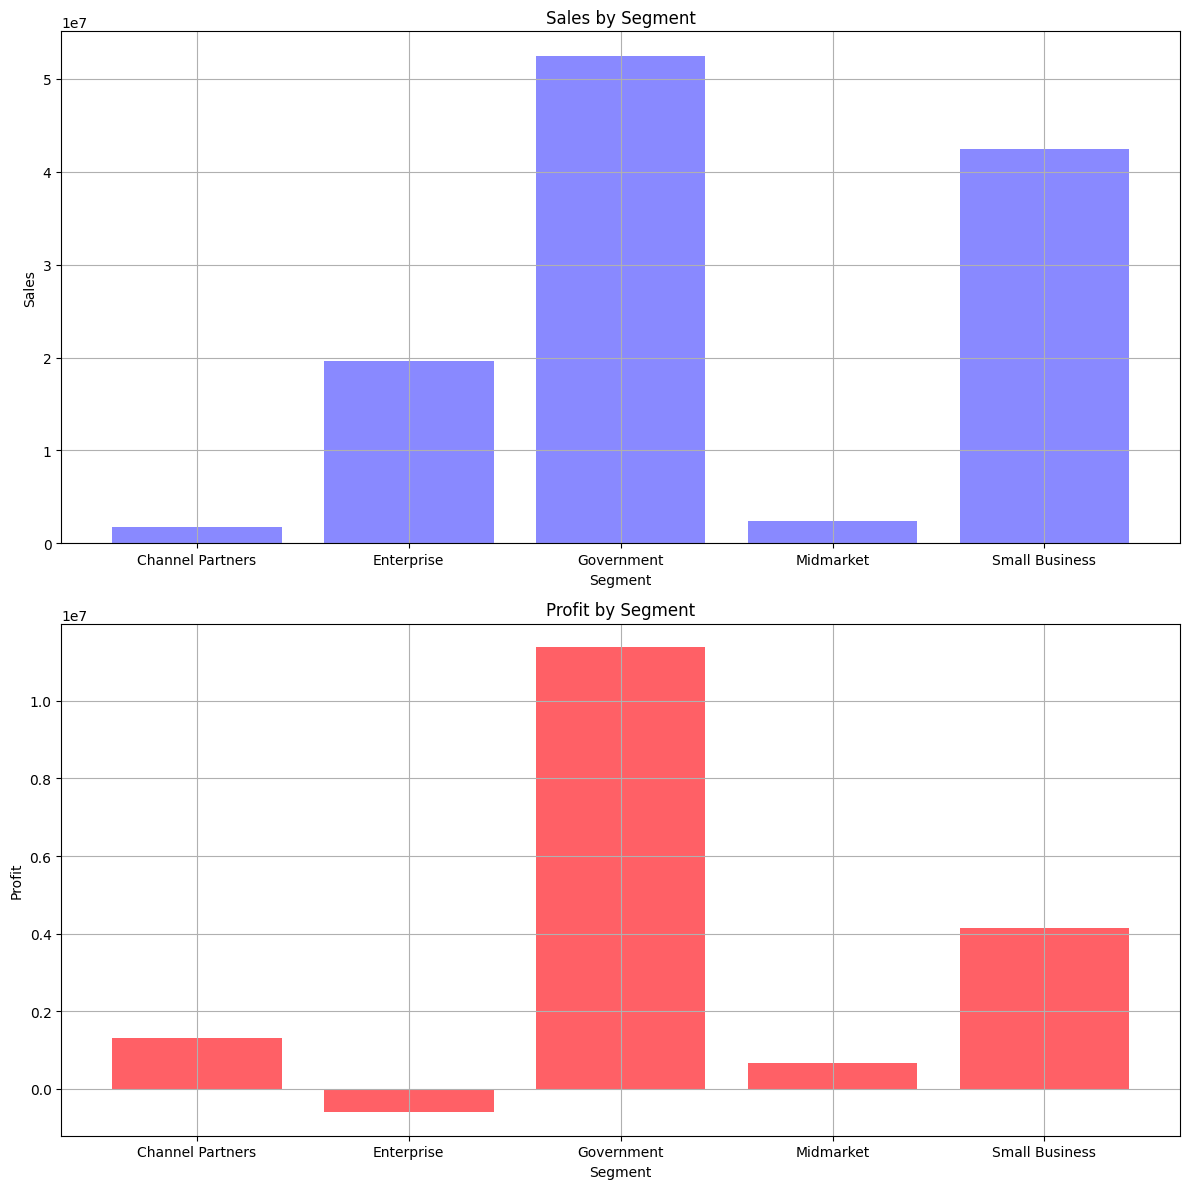

In [17]:
# Group data by Segment
grouped_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plot Sales and Profit by Segment
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(grouped_segment.index, grouped_segment['Sales'], color=blue, alpha=0.7)
ax[0].set_title('Sales by Segment')
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Sales')
ax[0].grid()

ax[1].bar(grouped_segment.index, grouped_segment['Profit'], color=red, alpha=0.7)
ax[1].set_title('Profit by Segment')
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('Profit')
ax[1].grid()

plt.tight_layout()
plt.show()

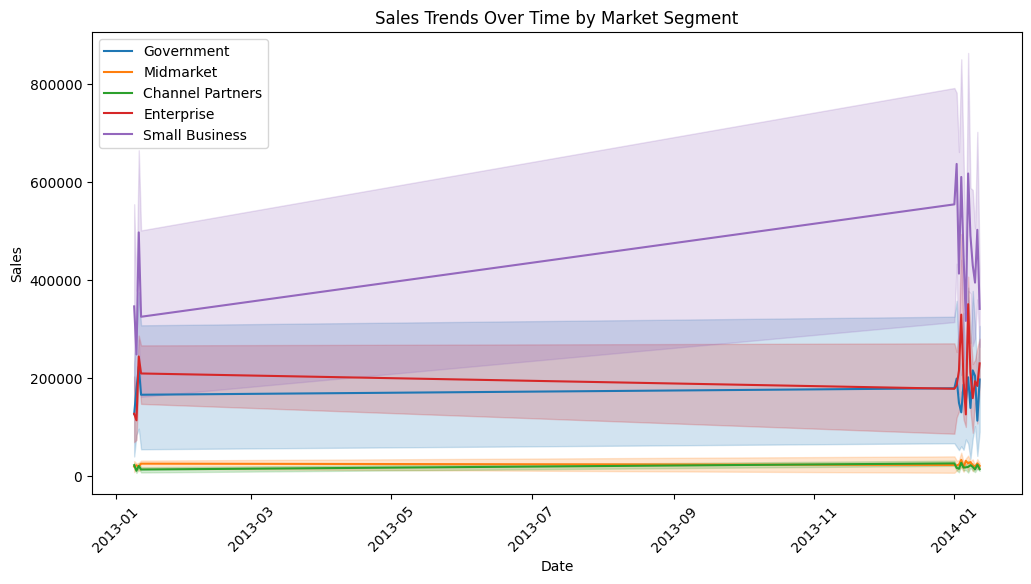

In [18]:
# Line plot for sales trends over time in each market segment
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', hue='Segment', data=df)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trends Over Time by Market Segment')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

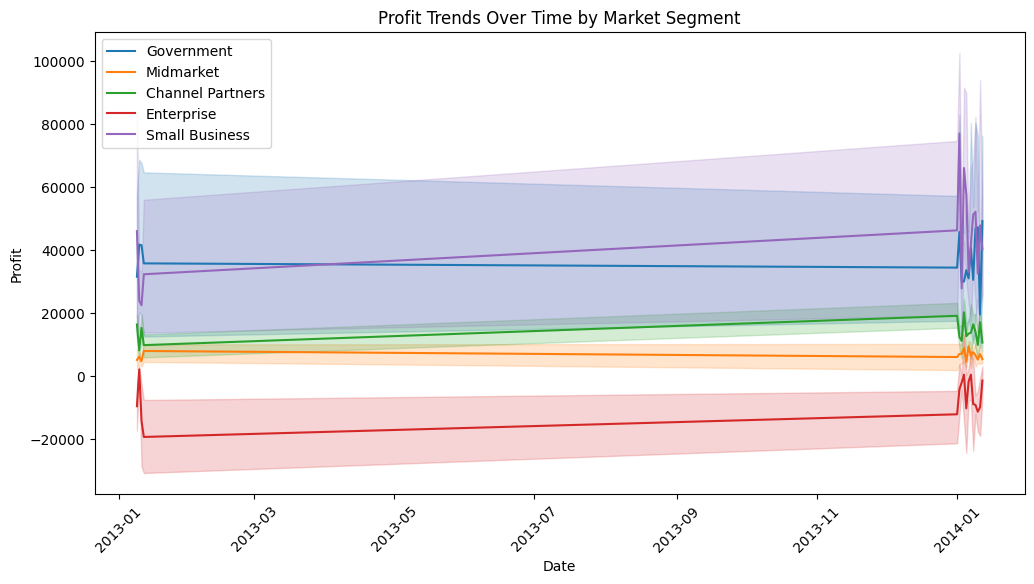

In [19]:
# Line plot for profit trends over time in each market segment
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Profit', hue='Segment', data=df)
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Profit Trends Over Time by Market Segment')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

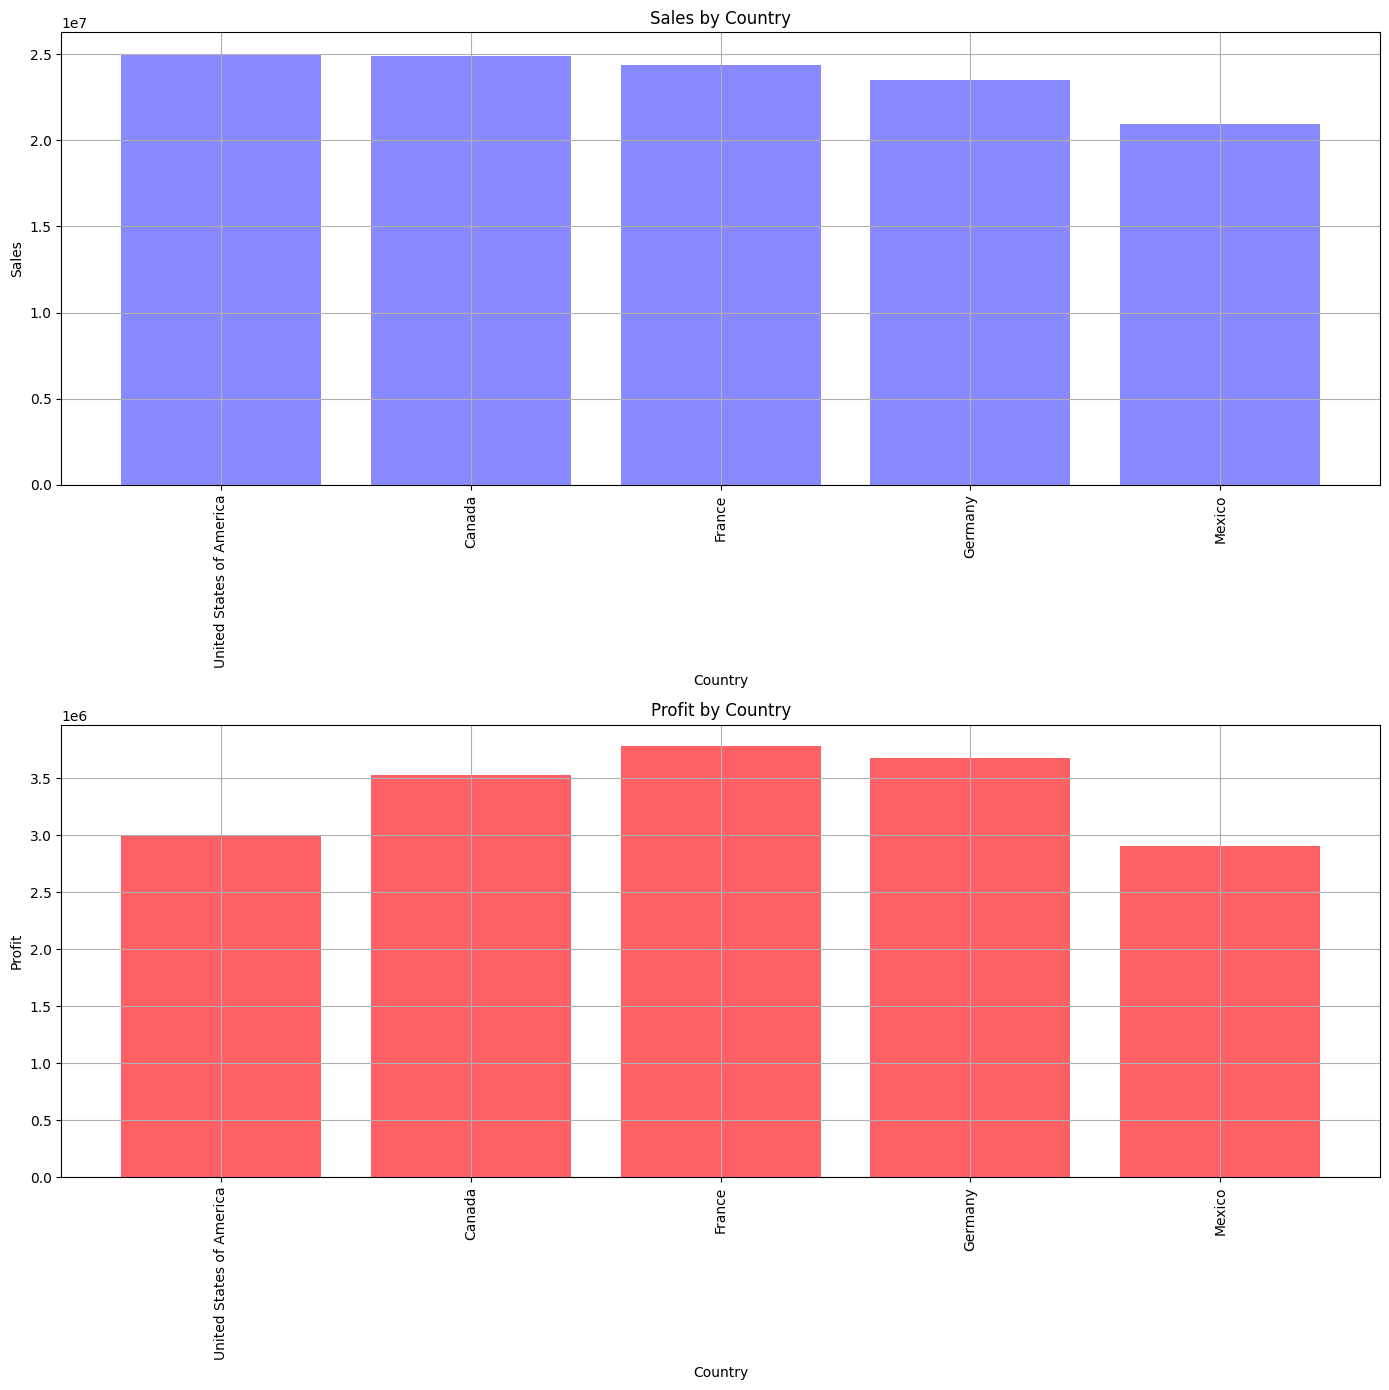

In [20]:
# Group data by Country
grouped_country = df.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum'})

# Sort data by Sales
grouped_country = grouped_country.sort_values(by='Sales', ascending=False)

# Plot Sales and Profit by Country
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].bar(grouped_country.index, grouped_country['Sales'], color=blue, alpha=0.7)
ax[0].set_title('Sales by Country')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Sales')
ax[0].tick_params(axis='x', rotation=90)
ax[0].grid()

ax[1].bar(grouped_country.index, grouped_country['Profit'], color=red, alpha=0.7)
ax[1].set_title('Profit by Country')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Profit')
ax[1].tick_params(axis='x', rotation=90)
ax[1].grid()

plt.tight_layout()
plt.show()

In [21]:
df['Discounts'].describe()

,Discounts
count,700.000000
mean,13150.354671
std,22962.928760
min,0.000000
25%,800.320000
50%,2585.250000
75%,15956.347500
max,149677.500000


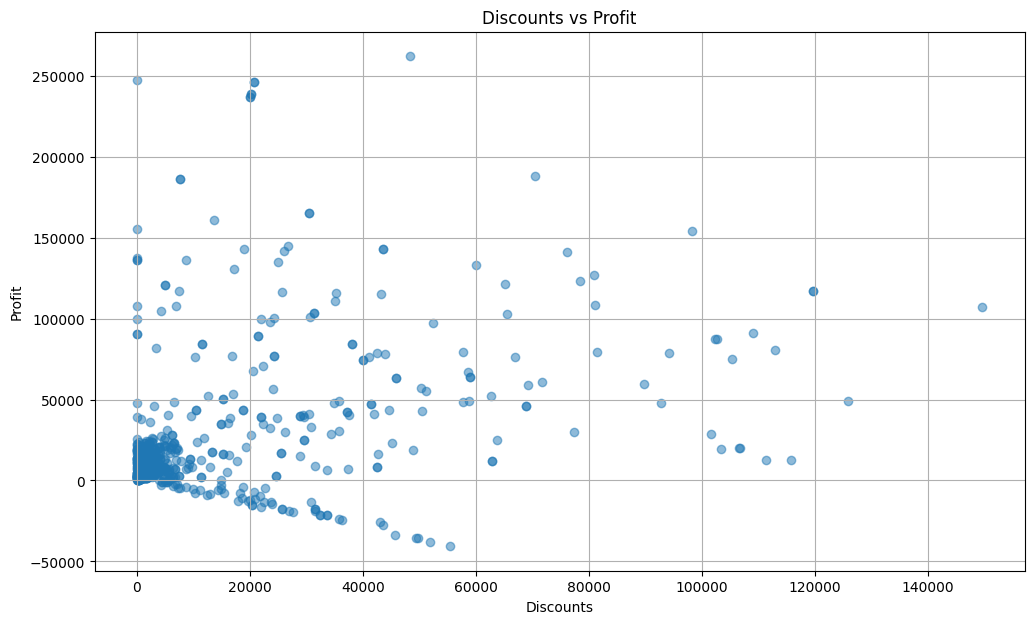

In [22]:
plt.figure(figsize=(12, 7))
plt.scatter(df['Discounts'], df['Profit'], alpha=0.5)
plt.title('Discounts vs Profit')
plt.xlabel('Discounts')
plt.ylabel('Profit')
plt.grid()
plt.show()

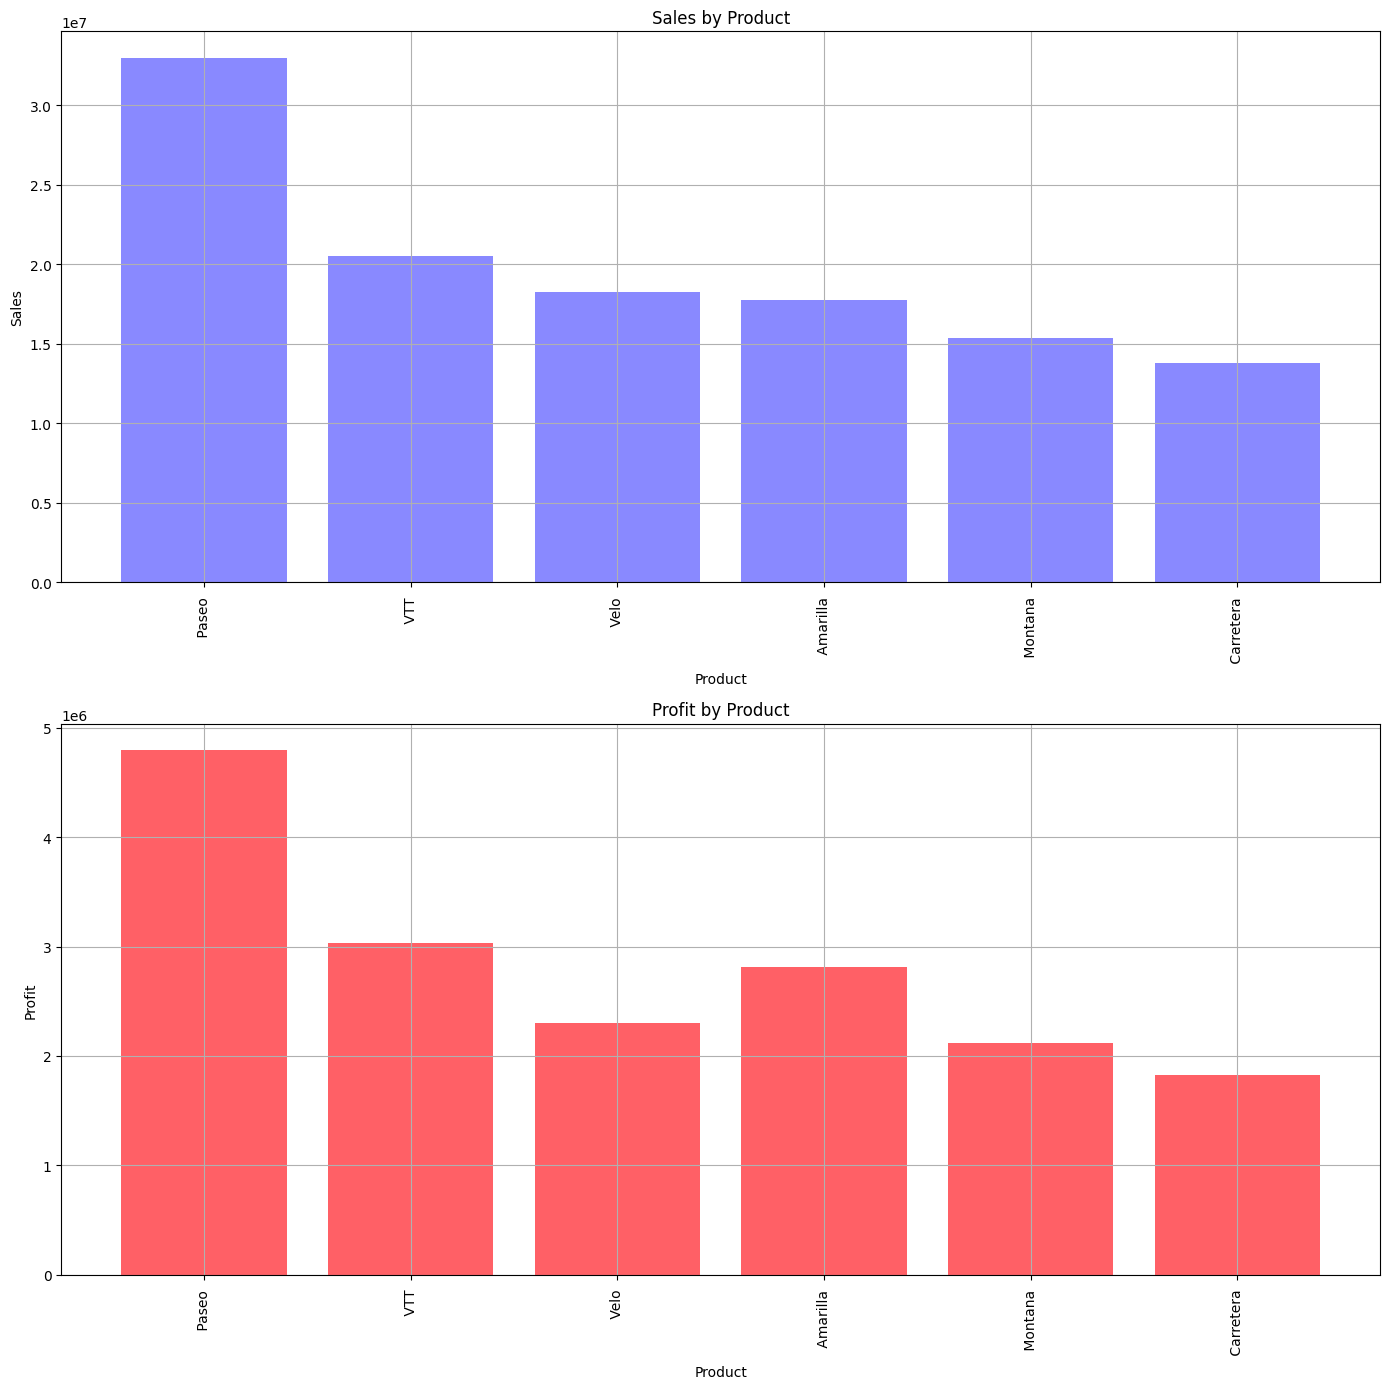

In [23]:
grouped_product = df.groupby('Product').agg({'Sales': 'sum', 'Profit': 'sum'})

# Sort data by Sales
grouped_product = grouped_product.sort_values(by='Sales', ascending=False)

# Plot Sales and Profit by Product
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].bar(grouped_product.index, grouped_product['Sales'], color=blue, alpha=0.7)
ax[0].set_title('Sales by Product')
ax[0].set_xlabel('Product')
ax[0].set_ylabel('Sales')
ax[0].tick_params(axis='x', rotation=90)
ax[0].grid()

ax[1].bar(grouped_product.index, grouped_product['Profit'], color=red, alpha=0.7)
ax[1].set_title('Profit by Product')
ax[1].set_xlabel('Product')
ax[1].set_ylabel('Profit')
ax[1].tick_params(axis='x', rotation=90)
ax[1].grid()

plt.tight_layout()
plt.show()

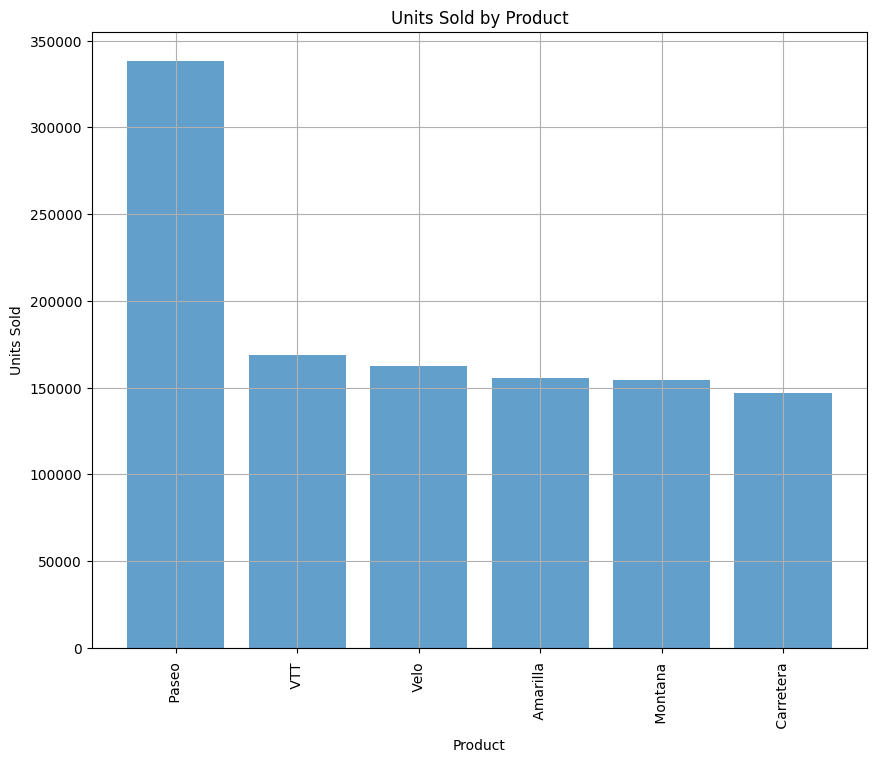

In [24]:
# Calculate total 'Units Sold' for each product
product_units_sold = df.groupby('Product').agg({'Units Sold': 'sum'})

# Sort data by 'Units Sold'
product_units_sold = product_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Product
plt.figure(figsize=(10, 8))
plt.bar(product_units_sold.index, product_units_sold['Units Sold'], alpha=0.7)
plt.title('Units Sold by Product')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
plt.grid()
plt.show()

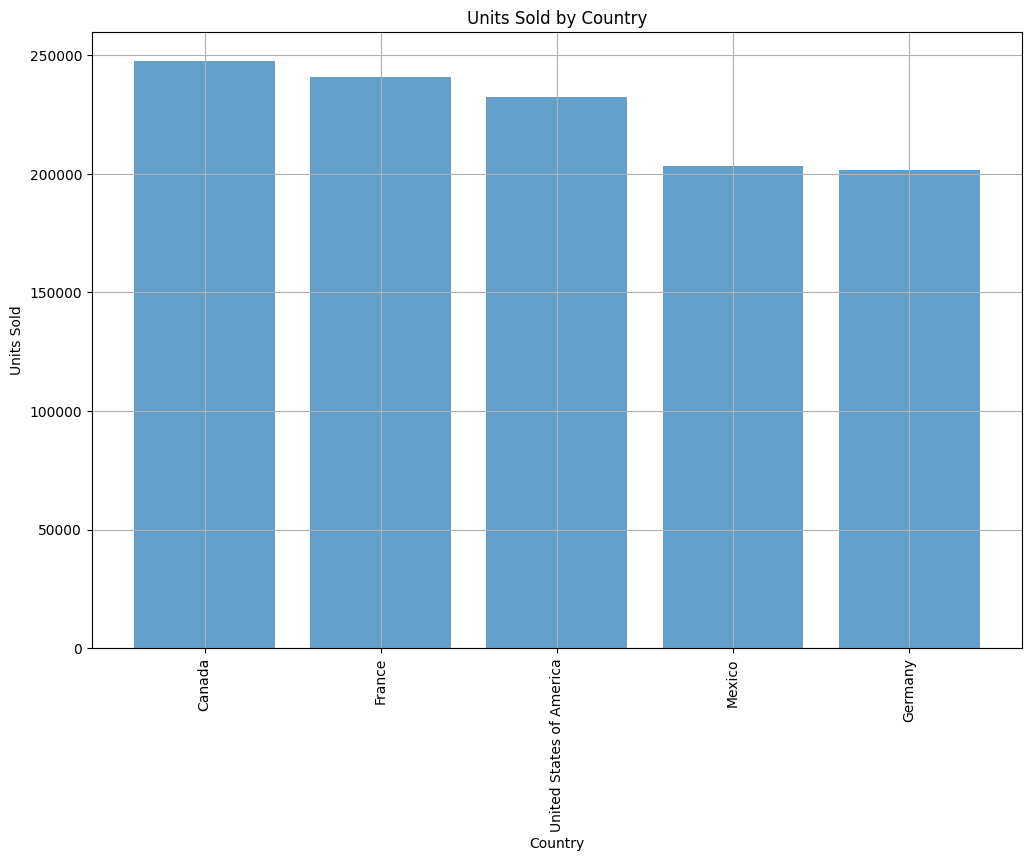

In [25]:
# Calculate total 'Units Sold' for each country
country_units_sold = df.groupby('Country').agg({'Units Sold': 'sum'})

# Sort data by 'Units Sold'
country_units_sold = country_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Country
plt.figure(figsize=(12, 8))
plt.bar(country_units_sold.index, country_units_sold['Units Sold'], alpha=0.7)
plt.title('Units Sold by Country')
plt.xlabel('Country')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
plt.grid()
plt.show()

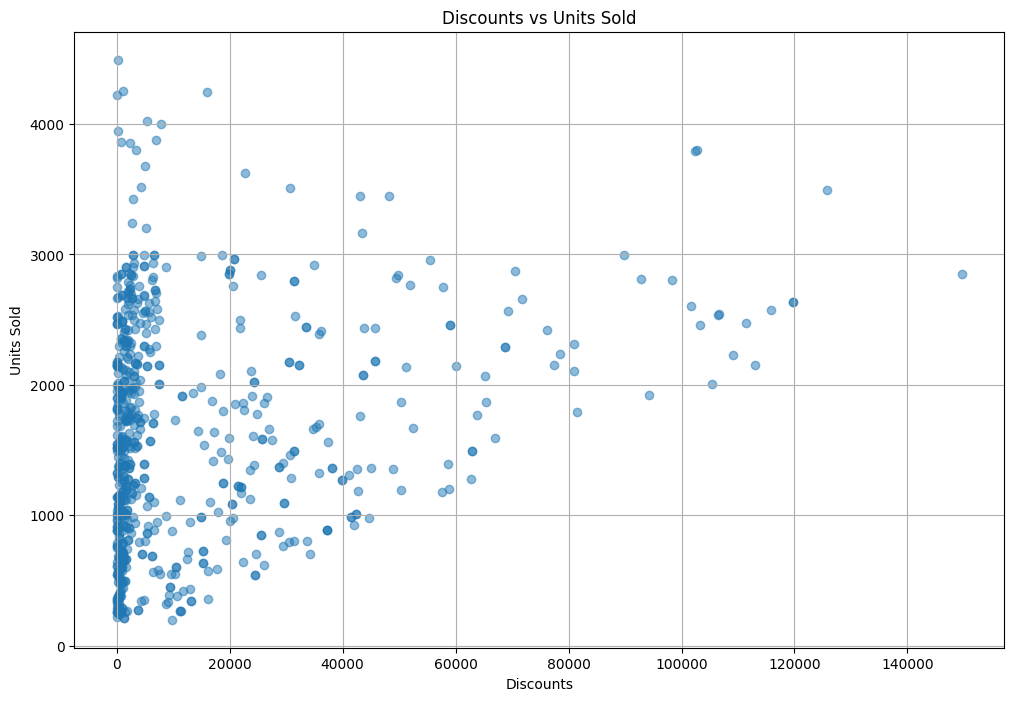

In [26]:
# Create a scatter plot of 'Discounts' vs 'Units Sold'
plt.figure(figsize=(12, 8))
plt.scatter(df['Discounts'], df['Units Sold'], alpha=0.5)
plt.title('Discounts vs Units Sold')
plt.xlabel('Discounts')
plt.ylabel('Units Sold')
plt.grid()
plt.show()

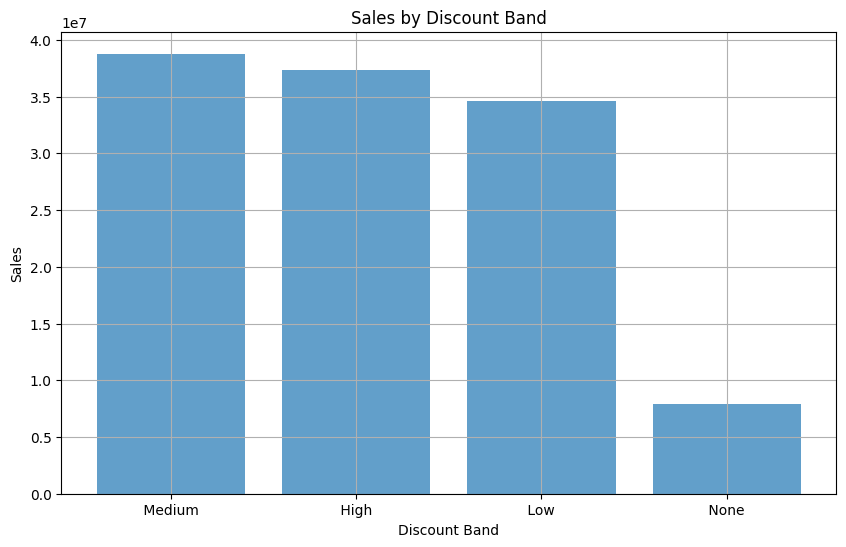

In [27]:
grouped_discount = df.groupby('Discount Band').agg({'Sales': 'sum'})

# Sort data by Sales
grouped_discount = grouped_discount.sort_values(by='Sales', ascending=False)

# Plot Sales by Discount Band
plt.figure(figsize=(10, 6))
plt.bar(grouped_discount.index, grouped_discount['Sales'], alpha=0.7)
plt.title('Sales by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Sales')
plt.grid()
plt.show()

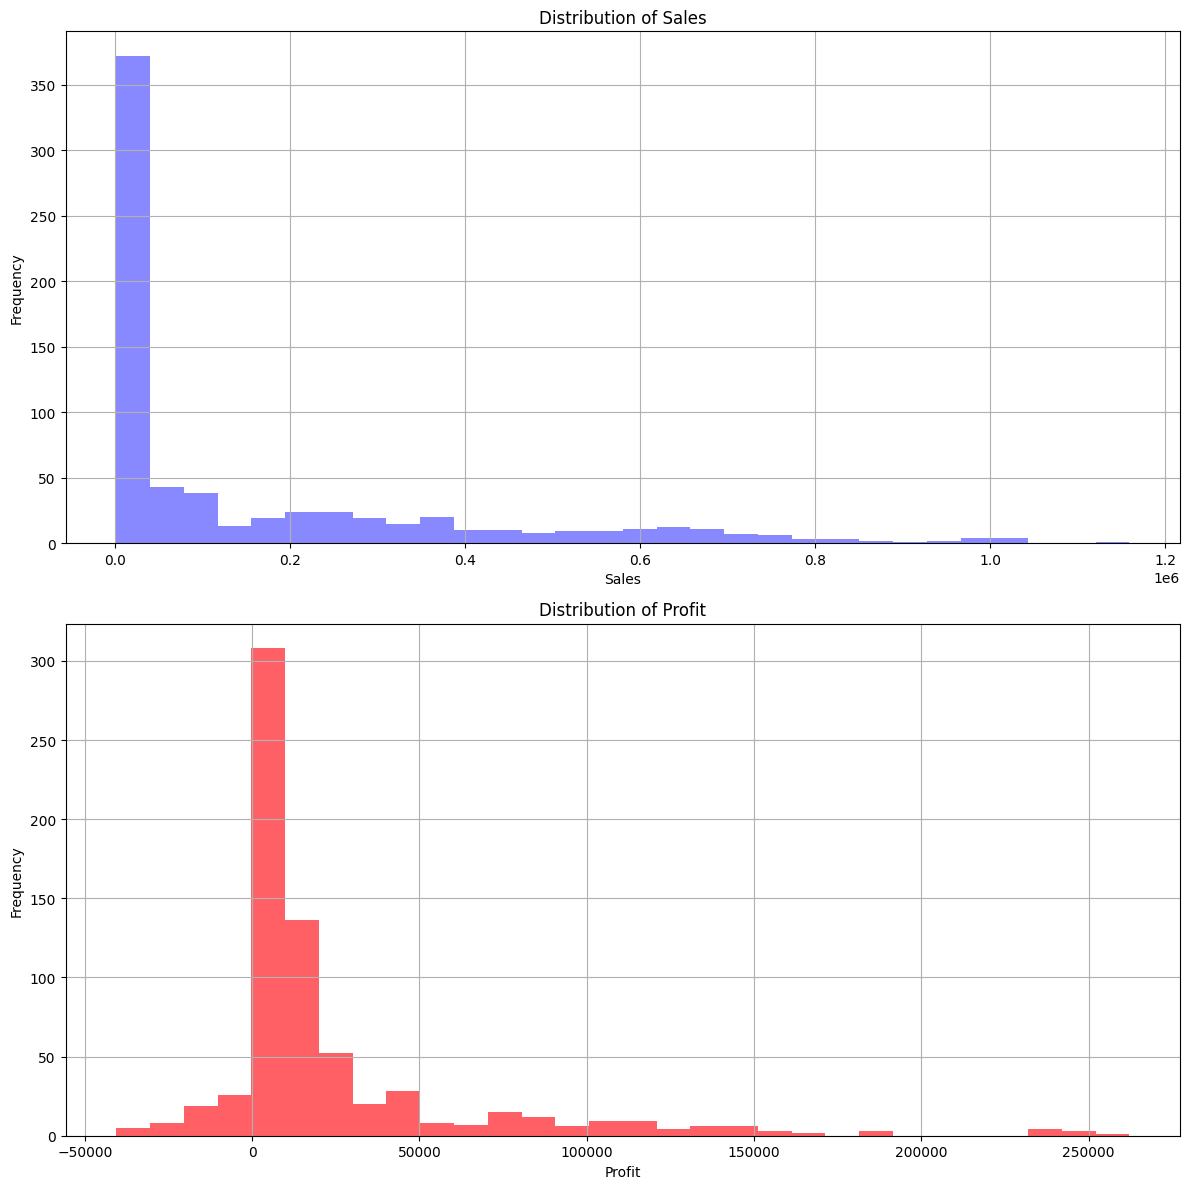

In [28]:
# Create histograms for 'Sales' and 'Profit'
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].hist(df['Sales'], bins=30, color=blue, alpha=0.7)
ax[0].set_title('Distribution of Sales')
ax[0].set_xlabel('Sales')
ax[0].set_ylabel('Frequency')
ax[0].grid()

ax[1].hist(df['Profit'], bins=30, color=red, alpha=0.7)
ax[1].set_title('Distribution of Profit')
ax[1].set_xlabel('Profit')
ax[1].set_ylabel('Frequency')
ax[1].grid()

plt.tight_layout()
plt.show()

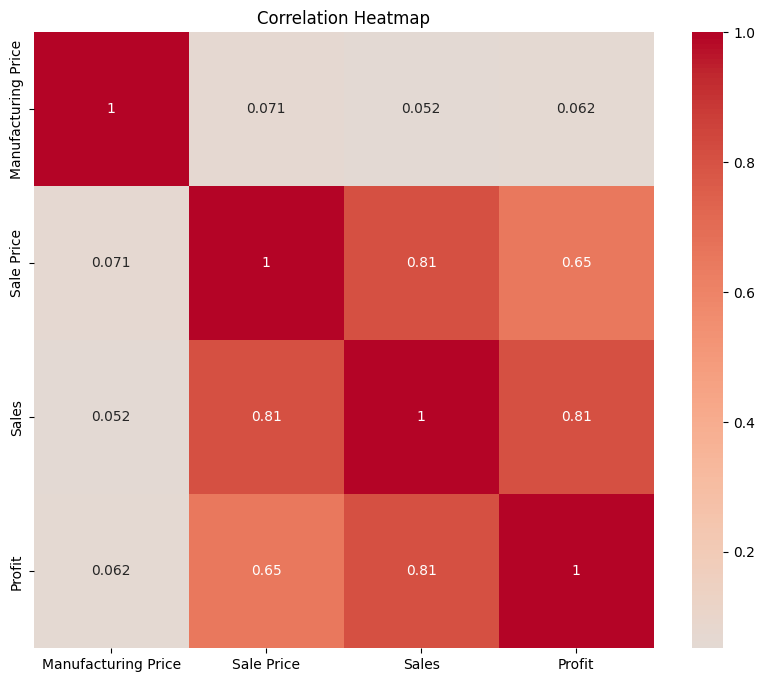

In [29]:
import seaborn as sns

correlation = df[['Manufacturing Price', 'Sale Price', 'Sales', 'Profit']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

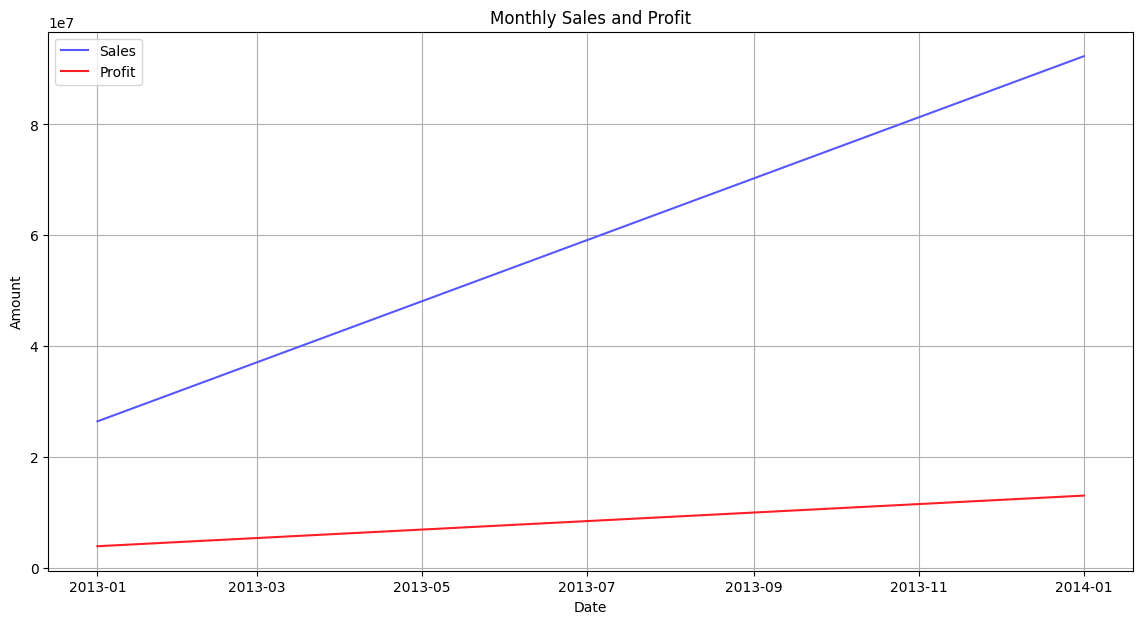

In [30]:
monthly_data = df.groupby([df['Date'].dt.year, df['Date'].dt.month]).agg({'Sales': 'sum', 'Profit': 'sum'})
monthly_data.index.names = ['Year', 'Month']
monthly_data.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_data['Year-Month'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))

# Plot monthly sales and profit
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Year-Month'], monthly_data['Sales'],color=blue, label='Sales')
plt.plot(monthly_data['Year-Month'], monthly_data['Profit'],color=red, label='Profit')
plt.title('Monthly Sales and Profit')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

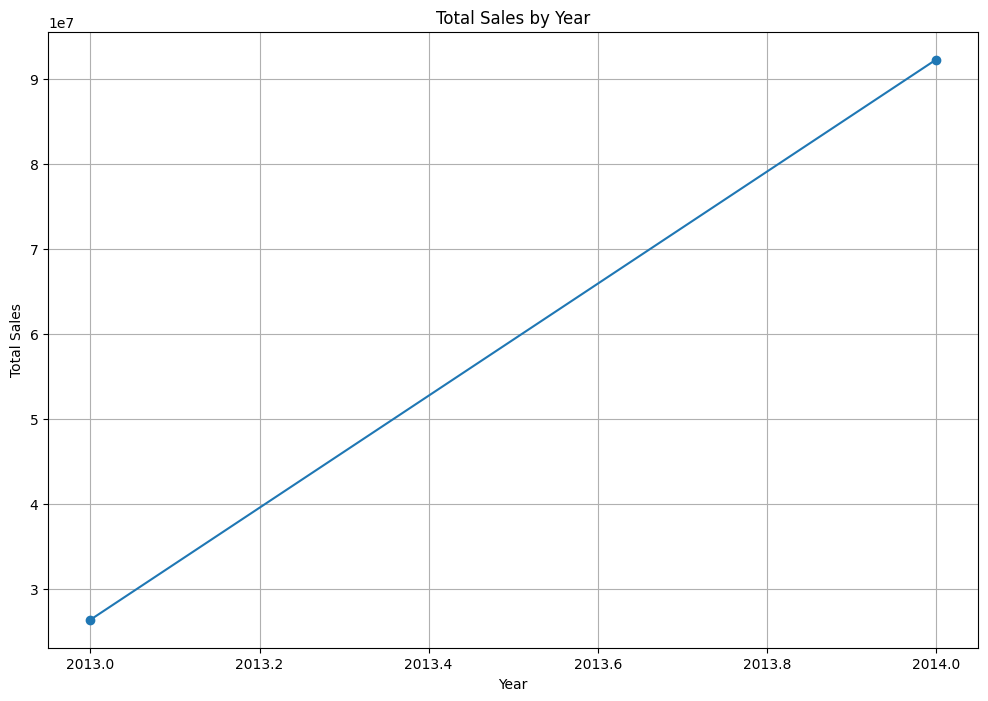

In [31]:
# Calculate total 'Sales' for each year
yearly_sales = df.groupby(df['Date'].dt.year).agg({'Sales': 'sum'})

# Plot total 'Sales' by year
plt.figure(figsize=(12, 8))
plt.plot(yearly_sales.index, yearly_sales['Sales'], marker='o')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

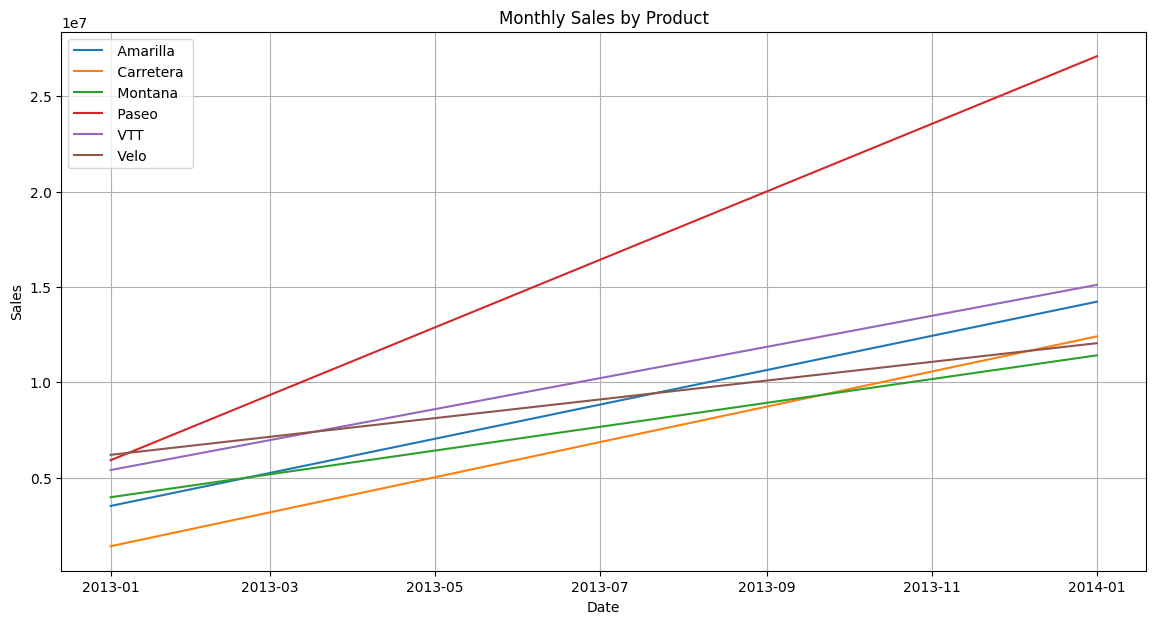

In [32]:
# Create a new dataframe with total monthly sales for each product
monthly_product_sales = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Product']).agg({'Sales': 'sum'})
monthly_product_sales.index.names = ['Year', 'Month', 'Product']
monthly_product_sales.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_product_sales['Year-Month'] = pd.to_datetime(monthly_product_sales[['Year', 'Month']].assign(day=1))

# Plot monthly sales for each product
plt.figure(figsize=(14, 7))
for product in monthly_product_sales['Product'].unique():
    product_data = monthly_product_sales[monthly_product_sales['Product'] == product]
    plt.plot(product_data['Year-Month'], product_data['Sales'], label=product)
plt.title('Monthly Sales by Product')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

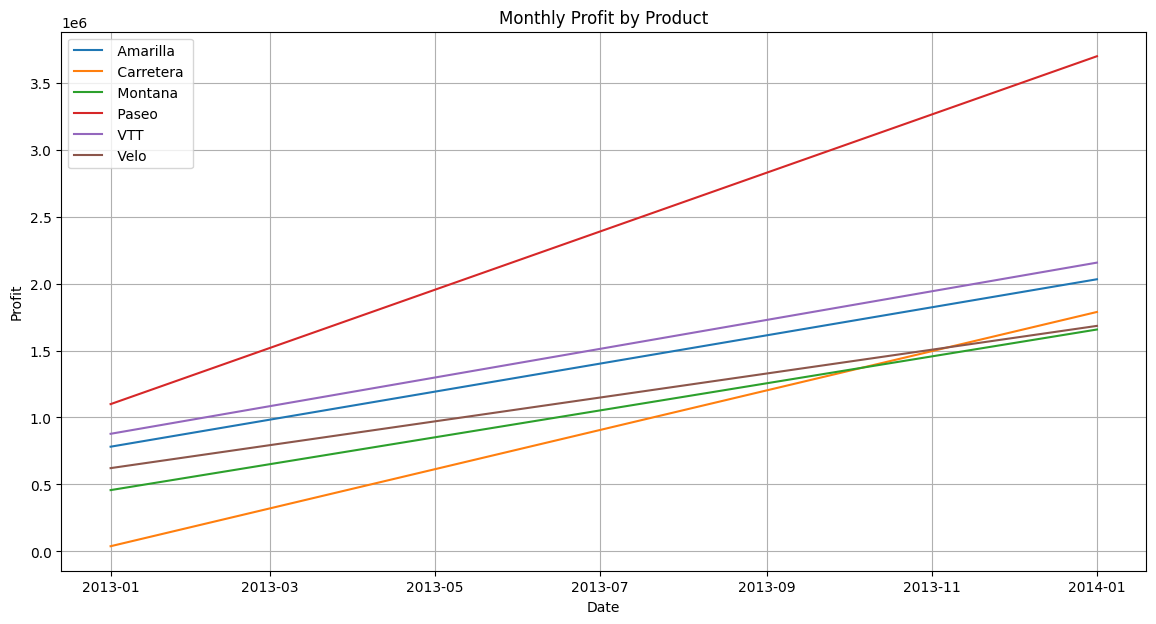

In [33]:
# Create a new dataframe with total monthly profit for each product
monthly_product_profit = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Product']).agg({'Profit': 'sum'})
monthly_product_profit.index.names = ['Year', 'Month', 'Product']
monthly_product_profit.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_product_profit['Year-Month'] = pd.to_datetime(monthly_product_profit[['Year', 'Month']].assign(day=1))

# Plot monthly profit for each product
plt.figure(figsize=(14, 7))
for product in monthly_product_profit['Product'].unique():
    product_data = monthly_product_profit[monthly_product_profit['Product'] == product]
    plt.plot(product_data['Year-Month'], product_data['Profit'], label=product)
plt.title('Monthly Profit by Product')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()


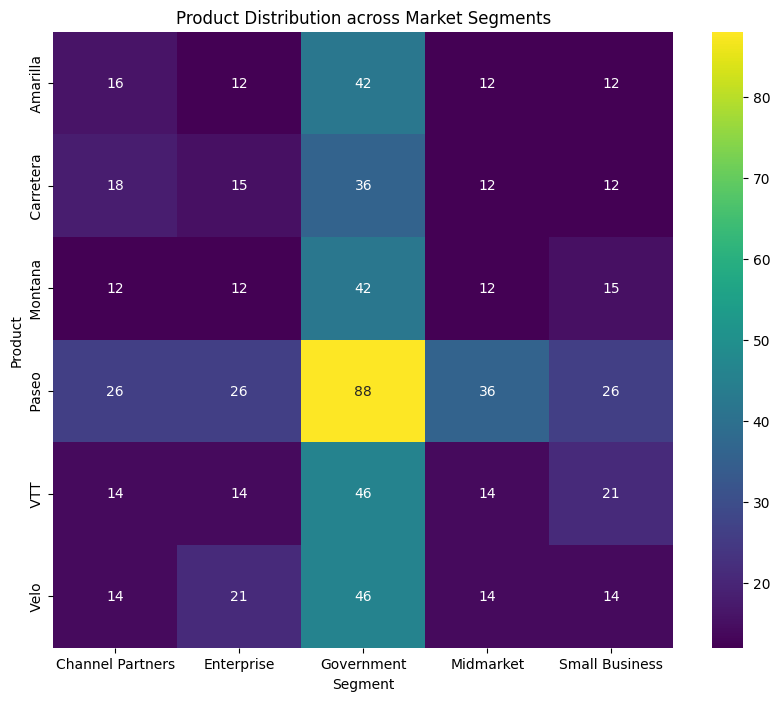

In [34]:
# Create a cross-tabulation of 'Product' and 'Segment'
product_segment_crosstab = pd.crosstab(df['Product'], df['Segment'])

# Plot a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8))
sns.heatmap(product_segment_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Product Distribution across Market Segments')
plt.show()

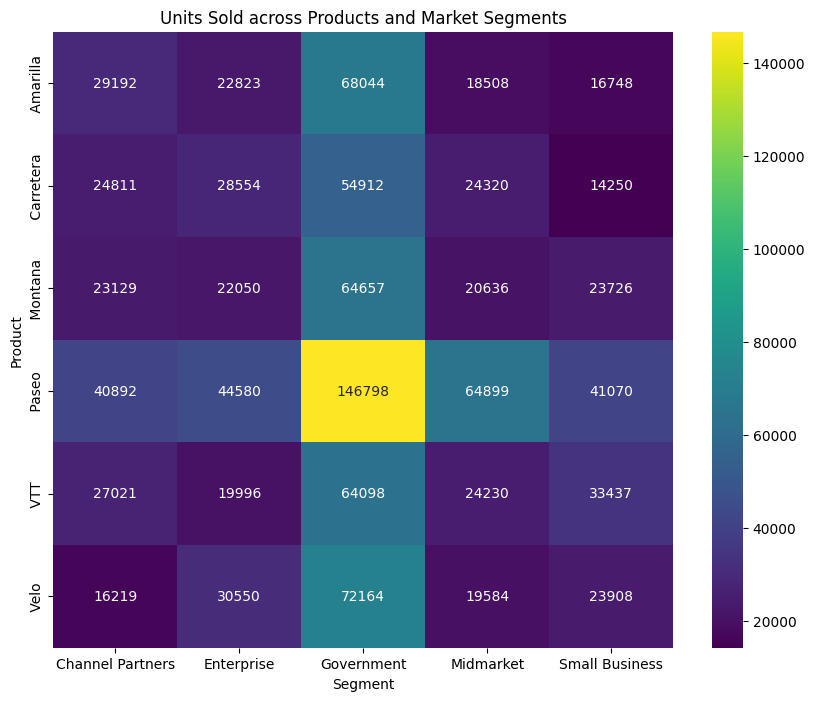

In [35]:
# Create a pivot table of 'Units Sold' with 'Product' and 'Segment' as dimensions
product_segment_units = df.pivot_table(values='Units Sold', index='Product', columns='Segment', aggfunc='sum')

# Plot a heatmap of the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(product_segment_units, annot=True, fmt='.0f', cmap='viridis')
plt.title('Units Sold across Products and Market Segments')
plt.show()

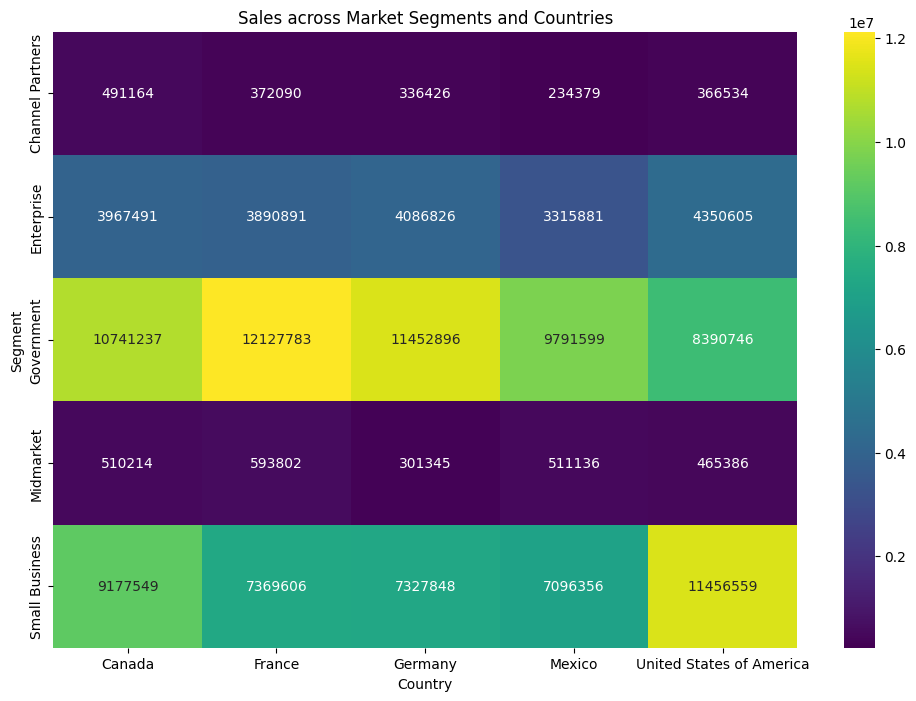

In [36]:
# Create a cross-tabulation of 'Segment' and 'Country' with 'Sales' as values
segment_country_sales = df.pivot_table(values='Sales', index='Segment', columns='Country', aggfunc='sum')

# Plot a heatmap of the cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(segment_country_sales, annot=True, fmt='.0f', cmap='viridis')
plt.title('Sales across Market Segments and Countries')
plt.show()

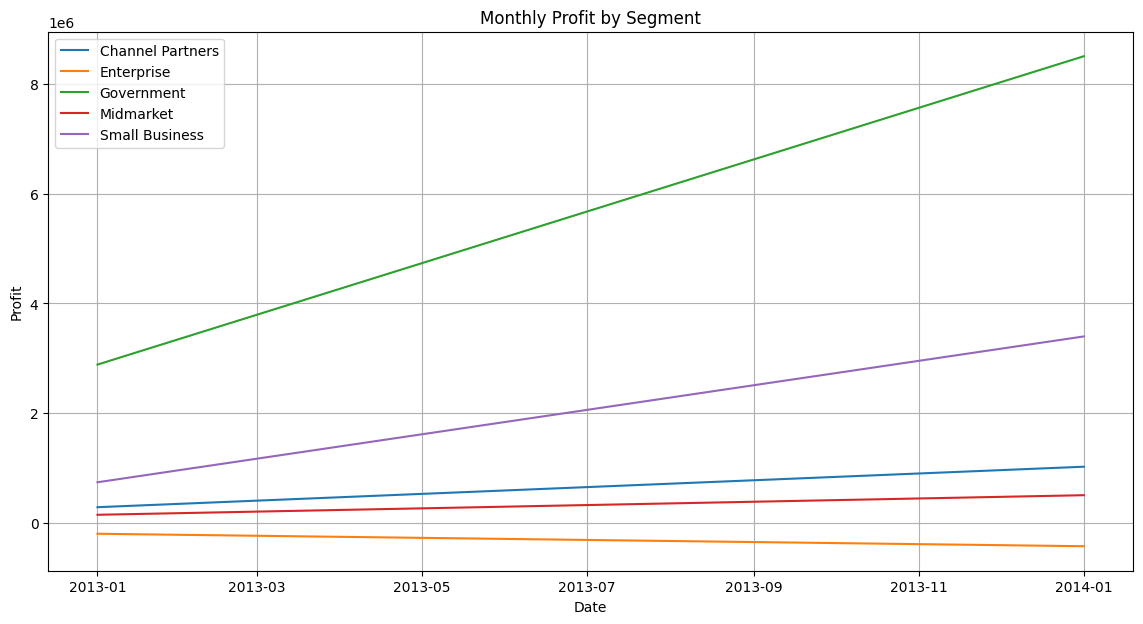

In [37]:
# Create a new dataframe with total monthly profit for each segment
monthly_segment_profit = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Segment']).agg({'Profit': 'sum'})
monthly_segment_profit.index.names = ['Year', 'Month', 'Segment']
monthly_segment_profit.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_segment_profit['Year-Month'] = pd.to_datetime(monthly_segment_profit[['Year', 'Month']].assign(day=1))

# Plot monthly profit for each segment
plt.figure(figsize=(14, 7))
for segment in monthly_segment_profit['Segment'].unique():
    segment_data = monthly_segment_profit[monthly_segment_profit['Segment'] == segment]
    plt.plot(segment_data['Year-Month'], segment_data['Profit'], label=segment)
plt.title('Monthly Profit by Segment')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

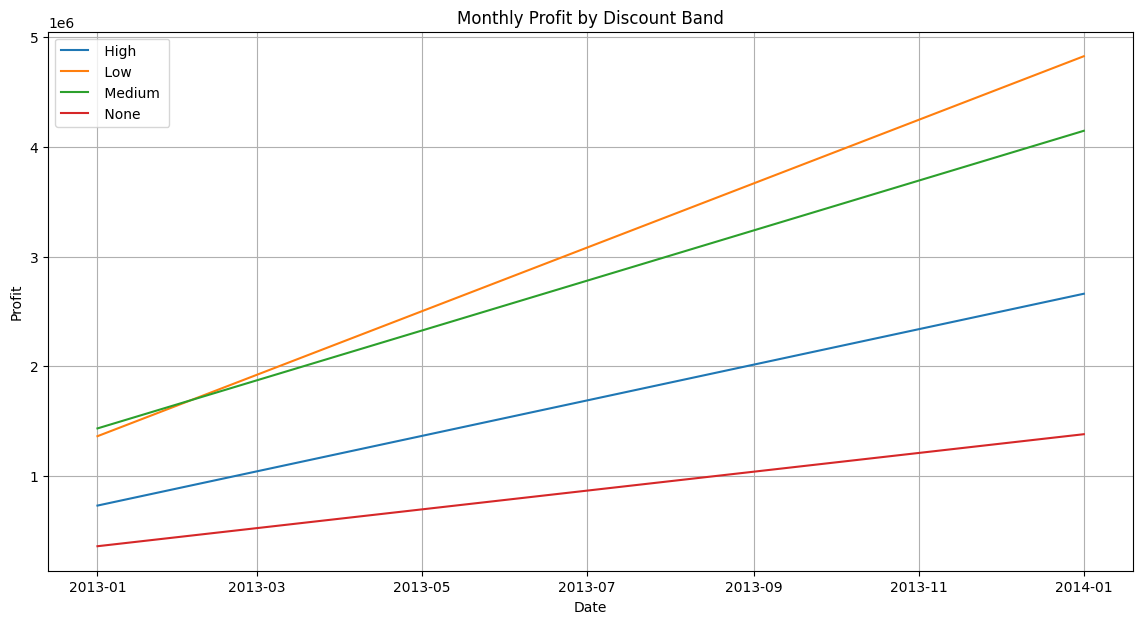

In [38]:
# Create a new dataframe with total monthly profit for each discount band
monthly_discount_profit = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Discount Band']).agg({'Profit': 'sum'})
monthly_discount_profit.index.names = ['Year', 'Month', 'Discount Band']
monthly_discount_profit.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_discount_profit['Year-Month'] = pd.to_datetime(monthly_discount_profit[['Year', 'Month']].assign(day=1))

# Plot monthly profit for each discount band
plt.figure(figsize=(14, 7))
for discount_band in monthly_discount_profit['Discount Band'].unique():
    discount_band_data = monthly_discount_profit[monthly_discount_profit['Discount Band'] == discount_band]
    plt.plot(discount_band_data['Year-Month'], discount_band_data['Profit'], label=discount_band)
plt.title('Monthly Profit by Discount Band')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

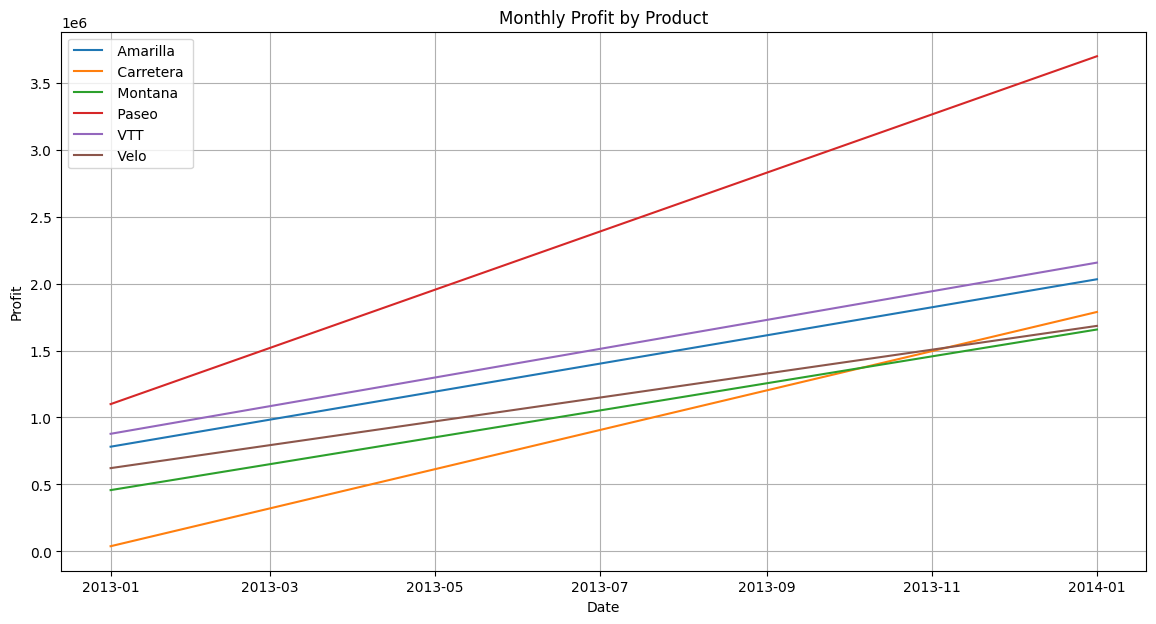

In [39]:
# Create a new dataframe with total monthly profit for each product
monthly_product_profit = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Product']).agg({'Profit': 'sum'})
monthly_product_profit.index.names = ['Year', 'Month', 'Product']
monthly_product_profit.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_product_profit['Year-Month'] = pd.to_datetime(monthly_product_profit[['Year', 'Month']].assign(day=1))

# Plot monthly profit for each product
plt.figure(figsize=(14, 7))
for product in monthly_product_profit['Product'].unique():
    product_data = monthly_product_profit[monthly_product_profit['Product'] == product]
    plt.plot(product_data['Year-Month'], product_data['Profit'], label=product)
plt.title('Monthly Profit by Product')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

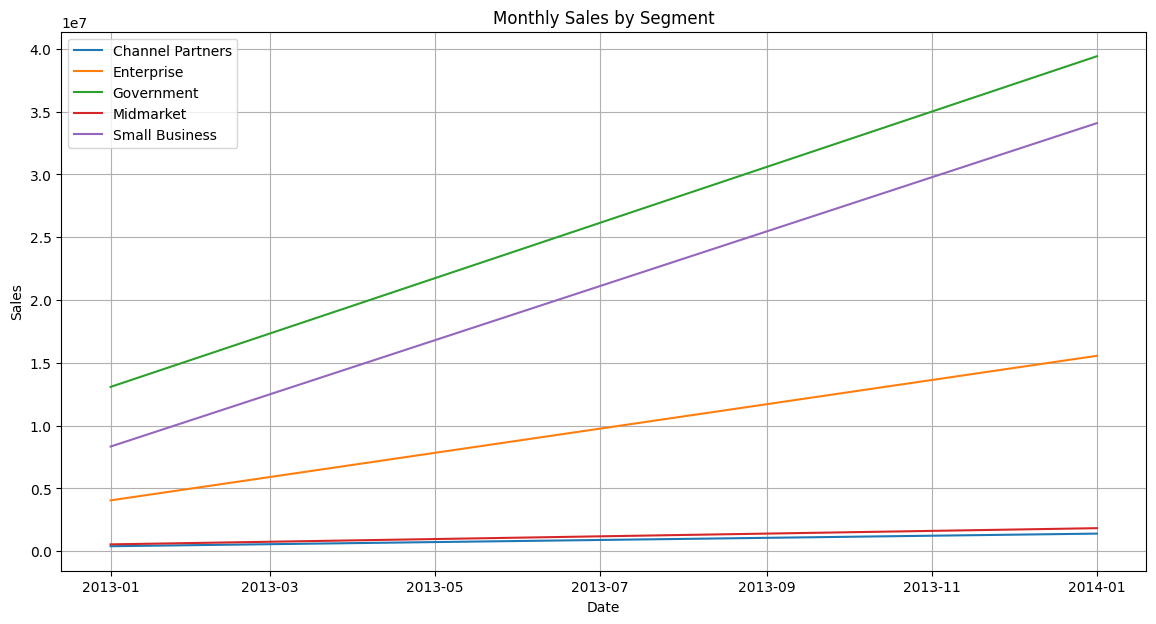

In [40]:
# Create a new dataframe with total monthly sales for each segment
monthly_segment_sales = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Segment']).agg({'Sales': 'sum'})
monthly_segment_sales.index.names = ['Year', 'Month', 'Segment']
monthly_segment_sales.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_segment_sales['Year-Month'] = pd.to_datetime(monthly_segment_sales[['Year', 'Month']].assign(day=1))

# Plot monthly sales for each segment
plt.figure(figsize=(14, 7))
for segment in monthly_segment_sales['Segment'].unique():
    segment_data = monthly_segment_sales[monthly_segment_sales['Segment'] == segment]
    plt.plot(segment_data['Year-Month'], segment_data['Sales'], label=segment)
plt.title('Monthly Sales by Segment')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

In [41]:
df_country_year=df.pivot_table(values=['Sales', 'COGS', 'Profit'],index=['Year','Country'],aggfunc='sum')
df_country_year=df_country_year.sort_values(['Year'])
df_country_year=df_country_year[['Sales', 'COGS', 'Profit']]
df_country_year

Sales        COGS      Profit
Year Country                                                      
2013 Canada                     5175888.78   4372217.0   803671.78
     France                     5132795.17   4321463.0   811332.17
     Germany                    6227735.47   5109516.0  1118219.47
     Mexico                     4754421.26   4161751.0   592670.26
     United States of America   5124414.83   4571844.0   552570.83
2014 Canada                    19711766.11  16986209.0  2725557.11
     France                    19221377.12  16251688.5  2969688.62
     Germany                   17277605.35  14715436.0  2562169.35
     Mexico                    16194930.85  13880078.0  2314852.85
     United States of America  19905415.35  17462445.5  2442969.85

/tmp/ipython-input-1023808133.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(),rotation=90)
/tmp/ipython-input-1023808133.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(),rotation=90)
/tmp/ipython-input-1023808133.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(),rotation=90)


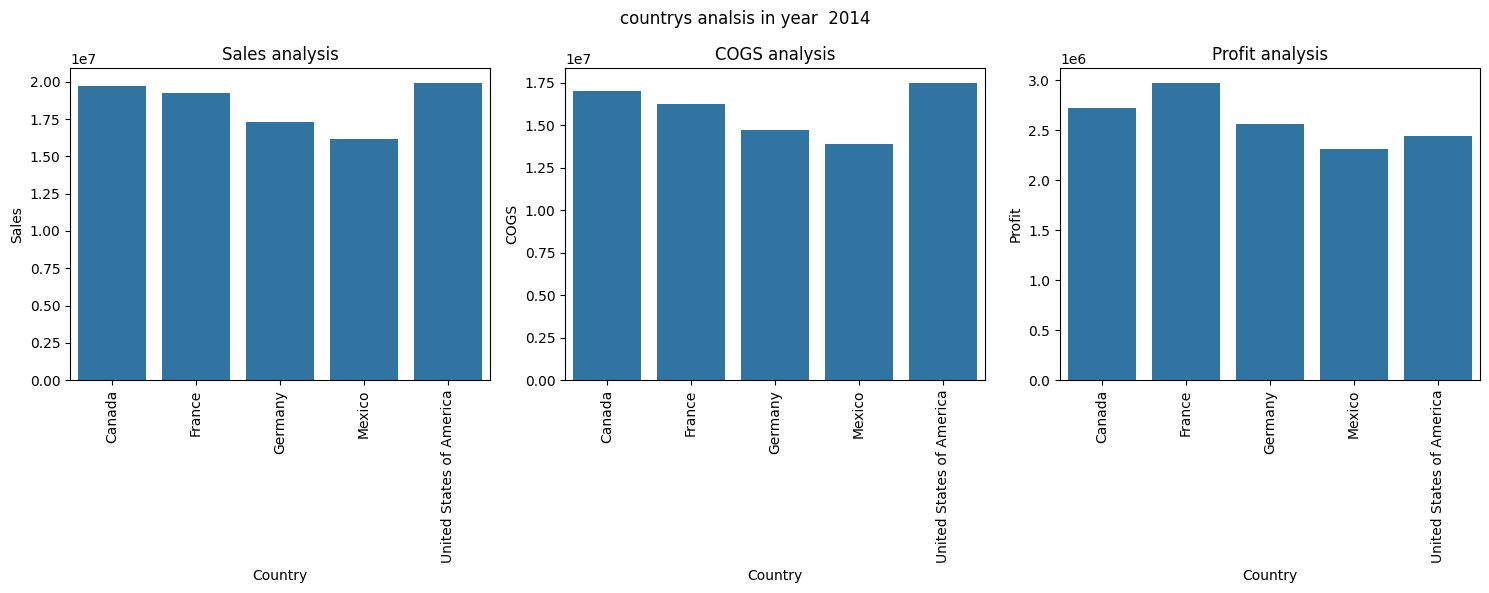

/tmp/ipython-input-1023808133.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(),rotation=90)
/tmp/ipython-input-1023808133.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(),rotation=90)
/tmp/ipython-input-1023808133.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(),rotation=90)


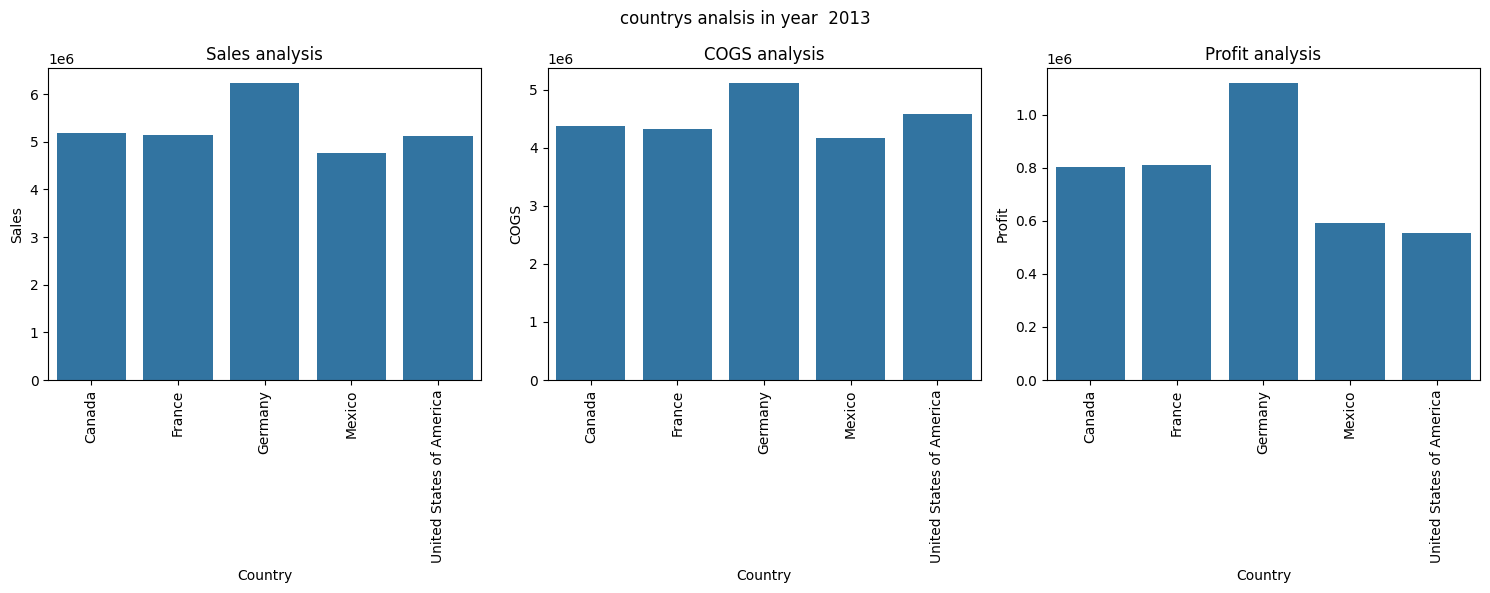

In [42]:
for year in df['Year'].unique():
  fig, axes=plt.subplots(nrows=1,ncols=3,figsize=(15,6))

  s_axes=axes.flatten()
  c_axes=0
  plt.suptitle(f'countrys analsis in year  {year}')
  for c in df_country_year.columns:
    countrys=df_country_year.loc[year].iloc[:,:0].index
    sns.barplot(data=df_country_year.loc[year],x=countrys,y=c,ax=s_axes[c_axes])
    s_axes[c_axes].set_title(f'{c} analysis')
    s_axes[c_axes].set_xticklabels(s_axes[c_axes].get_xticklabels(),rotation=90)
    c_axes+=1
  plt.subplots_adjust(wspace=0.7, hspace=0.7)
  plt.tight_layout()
  plt.show()

In [43]:
df["Profit Margin"] = df["Profit"] / df["Sales"]
df["Discount Ratio"] = df["Discounts"] / df["Gross Sales"]
df["Price per Unit"] = df["Sale Price"] / (df["Units Sold"] + 1e-6)

###Categorical Data Encoding

In [44]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name', 'Year',
       'Profit Margin', 'Discount Ratio', 'Price per Unit'],
      dtype='object')

In [45]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df["Segment"] = label_encoder.fit_transform(df["Segment"])
df["Country"] = label_encoder.fit_transform(df["Country"])
df["Product"] = label_encoder.fit_transform(df["Product"])
df["Discount Band"] = label_encoder.fit_transform(df["Discount Band"])

In [46]:
df = df.drop(columns=['Date', 'Month Name', 'Year'])
df.dtypes

,0
Segment,int64
Country,int64
Product,int64
Discount Band,int64
Units Sold,float64
Manufacturing Price,float64
Sale Price,float64
Gross Sales,float64
Discounts,float64
Sales,float64


In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
columns_to_normalize = [
    'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales',
    'Discounts', 'Sales', 'COGS', 'Profit'
]
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [48]:
df.describe()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Profit Margin,Discount Ratio,Price per Unit
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,2.000000,2.000000,2.665714,1.147143,0.328083,0.363724,0.324865,0.150087,0.087858,0.145095,0.152212,0.213830,7.900000,0.279010,0.073329,0.119219
std,1.196083,1.415225,1.594777,0.989100,0.202080,0.422578,0.398762,0.210883,0.153416,0.204507,0.214661,0.141209,3.377321,0.234189,0.046023,0.215826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.129412,0.000000,0.001558
25%,1.000000,1.000000,1.000000,0.000000,0.164240,0.007782,0.014577,0.012933,0.005347,0.012330,0.006920,0.143398,5.750000,0.130471,0.030000,0.007239
50%,2.000000,2.000000,3.000000,1.000000,0.312755,0.027237,0.037901,0.030008,0.017272,0.029273,0.022731,0.164653,9.000000,0.233716,0.070000,0.023646
75%,3.000000,3.000000,4.000000,2.000000,0.472714,0.961089,0.854227,0.229929,0.106605,0.224114,0.257647,0.208969,10.250000,0.431818,0.110000,0.154512
max,4.000000,4.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,0.750000,0.150000,1.750000


<Axes: >

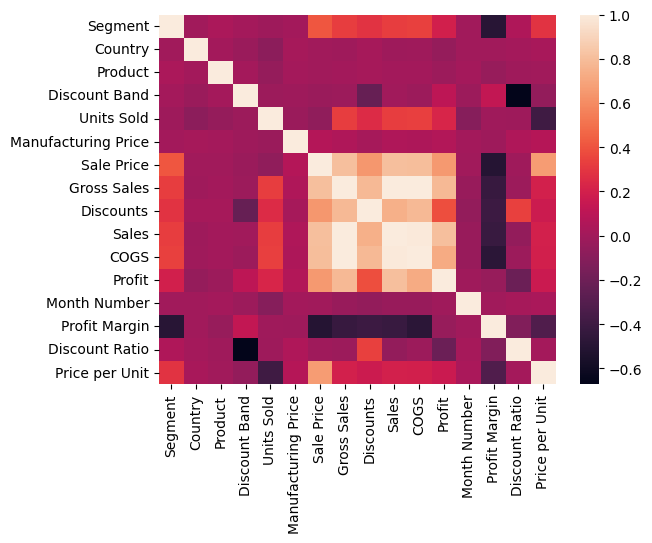

In [49]:
import seaborn as sns

sns.heatmap(df.corr())

<Axes: >

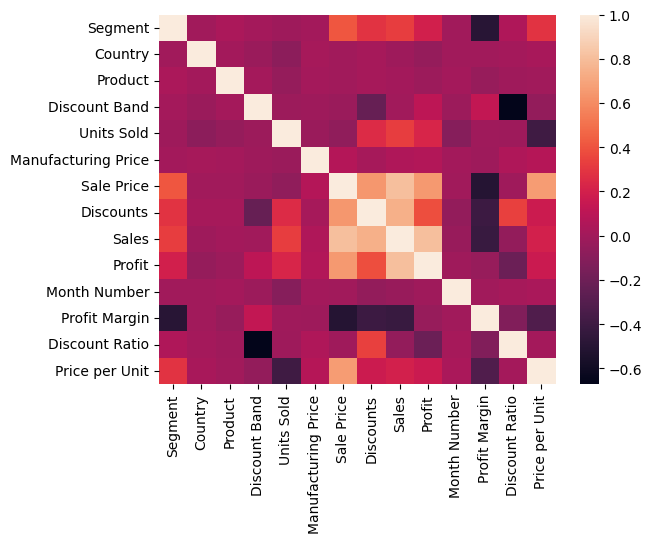

In [50]:
#Removal of highly correlating data
df = df.drop(columns=['COGS', 'Gross Sales'])
sns.heatmap(df.corr())

###Boosting

In [51]:
#Spliting data to train and test
from sklearn.model_selection import train_test_split
y = df["Units Sold"]
X = df.drop(['Units Sold', 'Sales'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

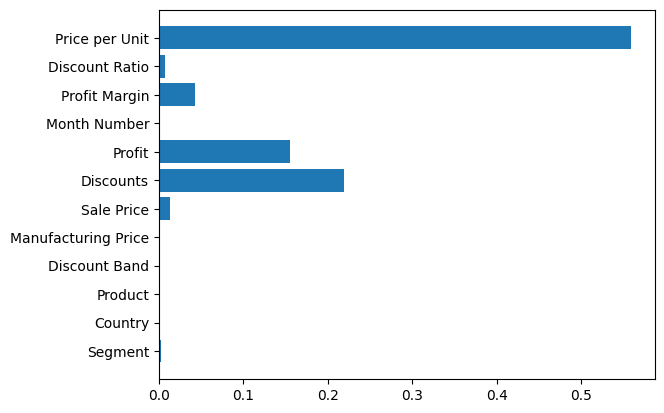

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
gb_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
importance = gb_model.feature_importances_
plt.barh(X_train.columns, importance)
plt.show()
prediction = gb_model.predict(X_test)

###Evalueting model with cross validation

In [53]:
from sklearn.model_selection import cross_val_score
import numpy as np
mae_scores = -cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("Mean MAE:", np.mean(mae_scores))
rmse_scores = cross_val_score(gb_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Mean RMSE:", np.mean(-rmse_scores))
r2_scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
print("Mean R2 score:", np.mean(r2_scores))

Mean MAE: 0.049626168865346335
Mean RMSE: 0.07386687679841142
Mean R2 score: 0.8448374934111023


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
}

from sklearn.model_selection import cross_val_score
import numpy as np

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name}: Mean R2 = {np.mean(scores):.4f}")


Linear Regression: Mean R2 = 0.3034
Random Forest: Mean R2 = 0.8984
SVR: Mean R2 = 0.1882
Gradient Boosting: Mean R2 = 0.8448


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42),
                    param_grid,
                    scoring='r2',
                    cv=5)
grid.fit(X, y)
print("Best Parameters:", grid.best_params_)
print("Best R2:", grid.best_score_)

Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}
Best R2: 0.8980655196723706


In [56]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}

grid = GridSearchCV(GradientBoostingRegressor(random_state=42),
                    param_grid,
                    scoring='r2',
                    cv=5)
grid.fit(X, y)
print("Best Parameters:", grid.best_params_)
print("Best R2:", grid.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
Best R2: 0.9059066948874044


In [57]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
scores = cross_val_score(RandomForestRegressor(random_state=42),
                         X, y, cv=cv, scoring='r2')
print("Mean R2:", np.mean(scores))

Mean R2: 0.9628621930389674


In [58]:
from sklearn.ensemble import VotingRegressor

ensemble = VotingRegressor([
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42))
])
ensemble.fit(X_train, y_train)
print("R2:", ensemble.score(X_test, y_test))

R2: 0.9496116640815555
